# Clusterização

A ideia é classificar o comportamento dos clientes de determinada empresa de cartão de crédito a partir da clusterização.

In [55]:
#  importando as bibliotecas 

import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [56]:
dados = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/alura-clustering-validation/base-de-dados/CC%20GENERAL.csv',
                    sep = ',').round(2)

In [57]:
dados.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,0.00,0,2,1000.0,201.80,139.51,0.00,12
1,C10002,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,0.25,4,0,7000.0,4103.03,1072.34,0.22,12
2,C10003,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,0.00,0,12,7500.0,622.07,627.28,0.00,12
3,C10004,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,0.08,1,1,7500.0,0.00,NaN,0.00,12
4,C10005,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,0.00,0,1,1200.0,678.33,244.79,0.00,12


In [58]:
dados.describe().round(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
count,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8950.00,8949.00,8950.00,8637.00,8950.00,8950.00
mean,1564.47,0.88,1003.20,592.44,411.07,978.87,0.49,0.20,0.36,0.13,3.25,14.71,4494.45,1733.14,864.21,0.15,11.52
std,2081.53,0.24,2136.63,1659.89,904.34,2097.16,0.40,0.30,0.40,0.20,6.82,24.86,3638.82,2895.06,2372.45,0.29,1.34
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,50.00,0.00,0.02,0.00,6.00
25%,128.28,0.89,39.64,0.00,0.00,0.00,0.08,0.00,0.00,0.00,0.00,1.00,1600.00,383.27,169.12,0.00,12.00
50%,873.38,1.00,361.28,38.00,89.00,0.00,0.50,0.08,0.17,0.00,0.00,7.00,3000.00,856.90,312.34,0.00,12.00
75%,2054.14,1.00,1110.13,577.40,468.64,1113.82,0.92,0.30,0.75,0.22,4.00,17.00,6500.00,1901.14,825.49,0.14,12.00
max,19043.14,1.00,49039.57,40761.25,22500.00,47137.21,1.00,1.00,1.00,1.50,123.00,358.00,30000.00,50721.48,76406.21,1.00,12.00


/usr/local/lib/python3.7/dist-packages/pandas/core/arraylike.py:364: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


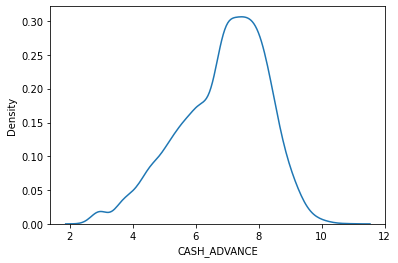

In [59]:
#  analisando uma variável importante para o objetivo (Pagamento adiantado)

sns.kdeplot(data=dados, x=np.log(dados["CASH_ADVANCE"]))

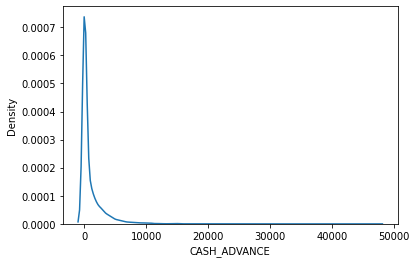

In [60]:
sns.kdeplot(data=dados, x="CASH_ADVANCE")

In [61]:
dados.shape

(8950, 18)

In [62]:
dados.corr().round(2)

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
BALANCE,1.00,0.32,0.18,0.16,0.13,0.50,-0.08,0.07,-0.06,0.45,0.39,0.15,0.53,0.32,0.40,-0.32,0.07
BALANCE_FREQUENCY,0.32,1.00,0.13,0.10,0.12,0.10,0.23,0.20,0.18,0.19,0.14,0.19,0.10,0.06,0.13,-0.09,0.12
PURCHASES,0.18,0.13,1.00,0.92,0.68,-0.05,0.39,0.50,0.32,-0.12,-0.07,0.69,0.36,0.60,0.09,0.18,0.09
ONEOFF_PURCHASES,0.16,0.10,0.92,1.00,0.33,-0.03,0.26,0.52,0.13,-0.08,-0.05,0.55,0.32,0.57,0.05,0.13,0.06
INSTALLMENTS_PURCHASES,0.13,0.12,0.68,0.33,1.00,-0.06,0.44,0.21,0.51,-0.13,-0.07,0.63,0.26,0.38,0.13,0.18,0.09
CASH_ADVANCE,0.50,0.10,-0.05,-0.03,-0.06,1.00,-0.22,-0.09,-0.18,0.63,0.66,-0.08,0.30,0.45,0.14,-0.15,-0.07
PURCHASES_FREQUENCY,-0.08,0.23,0.39,0.26,0.44,-0.22,1.00,0.50,0.86,-0.31,-0.20,0.57,0.12,0.10,0.00,0.31,0.06
ONEOFF_PURCHASES_FREQUENCY,0.07,0.20,0.50,0.52,0.21,-0.09,0.50,1.00,0.14,-0.11,-0.07,0.54,0.30,0.24,-0.03,0.16,0.08
PURCHASES_INSTALLMENTS_FREQUENCY,-0.06,0.18,0.32,0.13,0.51,-0.18,0.86,0.14,1.00,-0.26,-0.17,0.53,0.06,0.09,0.03,0.25,0.07
CASH_ADVANCE_FREQUENCY,0.45,0.19,-0.12,-0.08,-0.13,0.63,-0.31,-0.11,-0.26,1.00,0.80,-0.13,0.13,0.18,0.10,-0.25,-0.13


## Pré-processamento dos dados (Limpeza)

In [63]:
dados.drop(['TENURE','CUST_ID'], axis = 1, inplace = True)

In [64]:
dados.head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,40.90,0.82,95.40,0.00,95.4,0.00,0.17,0.00,0.08,0.00,0,2,1000.0,201.80,139.51,0.00
1,3202.47,0.91,0.00,0.00,0.0,6442.95,0.00,0.00,0.00,0.25,4,0,7000.0,4103.03,1072.34,0.22
2,2495.15,1.00,773.17,773.17,0.0,0.00,1.00,1.00,0.00,0.00,0,12,7500.0,622.07,627.28,0.00
3,1666.67,0.64,1499.00,1499.00,0.0,205.79,0.08,0.08,0.00,0.08,1,1,7500.0,0.00,NaN,0.00
4,817.71,1.00,16.00,16.00,0.0,0.00,0.08,0.08,0.00,0.00,0,1,1200.0,678.33,244.79,0.00


In [65]:
# buscando e preenchendo dados faltantes
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

In [66]:
dados.fillna(dados.mean(), inplace = True)

dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 16 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   BALANCE                           8950 non-null   float64
 1   BALANCE_FREQUENCY                 8950 non-null   float64
 2   PURCHASES                         8950 non-null   float64
 3   ONEOFF_PURCHASES                  8950 non-null   float64
 4   INSTALLMENTS_PURCHASES            8950 non-null   float64
 5   CASH_ADVANCE                      8950 non-null   float64
 6   PURCHASES_FREQUENCY               8950 non-null   float64
 7   ONEOFF_PURCHASES_FREQUENCY        8950 non-null   float64
 8   PURCHASES_INSTALLMENTS_FREQUENCY  8950 non-null   float64
 9   CASH_ADVANCE_FREQUENCY            8950 non-null   float64
 10  CASH_ADVANCE_TRX                  8950 non-null   int64  
 11  PURCHASES_TRX                     8950 non-null   int64  
 12  CREDIT

## Normalizando os dados 

In [67]:
from sklearn.preprocessing import Normalizer

values = Normalizer().fit_transform(dados.values)

print(values)

[[3.93548387e-02 7.89021216e-04 9.17958830e-02 ... 1.94176197e-01
  1.34239451e-01 0.00000000e+00]
 [2.93876075e-01 8.35065522e-05 0.00000000e+00 ... 3.76516361e-01
  9.84037540e-02 2.01883972e-05]
 [3.10798282e-01 1.24560961e-04 9.63067983e-02 ... 7.74856371e-02
  7.81345997e-02 0.00000000e+00]
 ...
 [2.27745986e-02 8.07816958e-04 1.40540685e-01 ... 7.90979328e-02
  8.02171972e-02 2.43318361e-04]
 [2.65305632e-02 1.63598570e-03 0.00000000e+00 ... 1.03579576e-01
  1.09906702e-01 4.92766776e-04]
 [1.86407130e-01 3.35093711e-04 5.46777910e-01 ... 3.15938354e-02
  4.41573489e-02 0.00000000e+00]]


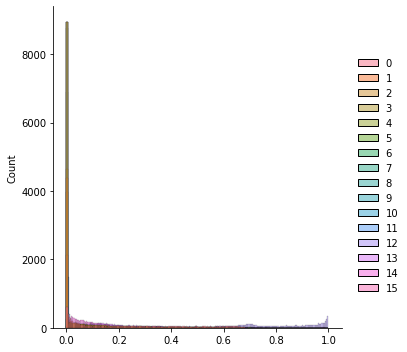

In [68]:
sns.displot(data=values)

## Executando a Clusterização

In [69]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters= 5, n_init = 10, max_iter = 300)

In [70]:
# treinando o modelo e executando o agrupamento

y_pred = kmeans.fit_predict(values)

## Critérios de validação: Métricas internas (independem dos labels) 

Critérios:

 - Compactação: Quão próximos estão os pontos em um mesmo cluster.
 - Seperação: Quão bem separados estão os pontos em clusters diferentes.

## Matemática por trás das validações 

## - Coeficiente de Silhouette

  s = beta - alfa / max(alfa, beta)

onde,

alfa = distância média entre o ponto e todos os outros pontos do ***mesmo cluster*** (compactação). **Quanto menor, melhor**

beta = distância média entre o ponto e todos os pontos do cluster ***mais próximo*** (seperação). **Quanto maior, melhor**




In [71]:
# calculando o método de validação (método silhouette)

from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score

In [72]:
clusters = kmeans.labels_
silhouette = silhouette_score(values, clusters, metric = 'euclidean')

print(silhouette)

0.36013400871115453


## Índice Davis-Bouldin

- Medida de similaridade entre dois clusters *i* e *j*

Quanto mais próximo de zero, melhor. Pois, se eu mensuro as similaridades por essa métrica, a ideia é maximizar as diferenças entre os clusters para tornar as caracteristicas de cada cluster mais únicas.


Rij = Si + Sj / Dij

onde,

s = similaridade ***dentro do cluster*** (compactação)
- Distância média de cada ponto do cluster de seu ***centróide***
    - Calculado através da distancia euclidiana

d = similaridade ***entre clusters*** (separação)
- Distância ***entre os centróides*** dos clusters
  - 

In [73]:
dbs = davies_bouldin_score(values, clusters)
print(dbs)

1.079980243328734


# Índice Calinsk-Harabasz
 - Mensura a dispersão dos pontos dentro de um cluster e entre clusters

  - Quanto mais disperso um cluster do outro, melhor.  

In [74]:
from sklearn.metrics import calinski_harabasz_score

In [75]:
calinski = calinski_harabasz_score(values, clusters)

print(calinski)

3368.0373091715414


## Validação relativa


In [76]:
#  criando função de clusterização
def clustering(n_cluster, values):
  kmeans = KMeans(n_clusters=n_cluster, n_init=10, max_iter = 300)
  values = Normalizer().fit_transform(dados.values)
  y_pred = kmeans.fit_predict(values)
  clusters = kmeans.labels_
  silhouette = silhouette_score(values, clusters, metric = 'euclidean')
  dbs = davies_bouldin_score(values, clusters)
  calinski = calinski_harabasz_score(values, clusters)
  return silhouette, dbs, calinski

In [77]:
# executando a função

s1, bds1, calinski1 = clustering(3, values)

print(s1, bds1, calinski1)

0.3221295594533245 1.3119879669613115 3449.5824608372263


In [78]:
s2, bds2, calinski2 = clustering(5, values)

print(s2, bds2, calinski2)

0.35074829479507724 1.1195296216484638 3347.3045238228806


In [79]:
s3, bds3, calinski3 = clustering(10, values)

print(s3, bds3, calinski3)

0.3456993890996339 1.1239934430490792 2923.5583408215457


In [80]:
s4, bds4, calinski4 = clustering(20, values)

print(s4, bds4, calinski4)

0.2921642373763148 1.1888063693660151 2310.5062795012195


In [81]:
values.shape

(8950, 16)

In [82]:
#  criando um cluster dummy 


random_data = np.random.rand(8950, 16) 

In [83]:
sD, dbsD, calinskiD = clustering(5, random_data)
print(sD, dbsD, calinskiD)
print(s2, bds2, calinski2)

0.3598618160072748 1.0839845579200418 3367.9996121412164
0.35074829479507724 1.1195296216484638 3347.3045238228806


# Validação da estabilidade do cluster 

In [84]:
df1, df2, df3 = np.array_split(values,3)

s1, dbs1, calinski1 = clustering(5,df1)
print(s1, dbs1, calinski1)

0.3600995540529386 1.0803392132993033 3368.0340040200017


In [85]:
s2, dbs2, calinski2 = clustering(5,df2)
print(s2, dbs2, calinski2)

0.36013400871115453 1.079980243328734 3368.0373091715414


In [86]:
s3, dbs3, calinski3 = clustering(5,df3)
print(s3, dbs3, calinski3)

0.359861995775336 1.0822875378848553 3368.056427929616


In [87]:
print(s1, dbs1, calinski1)
print(s2, dbs2, calinski2)
print(s3, dbs3, calinski3)

0.3600995540529386 1.0803392132993033 3368.0340040200017
0.36013400871115453 1.079980243328734 3368.0373091715414
0.359861995775336 1.0822875378848553 3368.056427929616


## Interpretando os clusters 

Text(0.5, 1.0, 'Compras X Pagamentos')

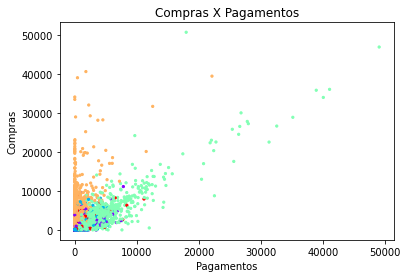

In [88]:
plt.scatter(dados['PURCHASES'], dados['PAYMENTS'], c = clusters, s = 5, cmap = 'rainbow')

plt.xlabel('Pagamentos')
plt.ylabel('Compras')
plt.title('Compras X Pagamentos')

In [89]:
dados.groupby(clusters).describe()

BALANCE                                                                  \
    count         mean          std   min        25%       50%        75%   
0  2662.0  3033.518689  2478.818868  6.82  1253.5125  2163.855  4223.6050   
1  3256.0   446.449048   847.459245  0.00    24.0900    84.220   419.0775   
2  1540.0  1148.523383  1663.565797  0.00   214.7650   559.835  1395.9850   
3  1070.0  1799.981673  1986.422178  0.00   507.3500  1092.020  2319.0500   
4   422.0  1844.735640  1846.043761  0.00   950.4125  1271.040  2023.0400   

            BALANCE_FREQUENCY            ... MINIMUM_PAYMENTS            \
        max             count      mean  ...              75%       max   
0  18495.56            2662.0  0.963238  ...        1331.2725   8345.64   
1   9630.37            3256.0  0.778428  ...         243.9725   4483.50   
2  19043.14            1540.0  0.930091  ...         543.2225  18621.01   
3  14581.46            1070.0  0.863224  ...         887.8575  21235.07   
4  11670.18             422.0  0.943768  ...        6691.7075  76406.21   

  PRC_FULL_PAYMENT                                                 
             count      mean       std  min  25%   50%   75%  max  
0           2662.0  0.001777  0.023157  0.0  0.0  0.00  0.00  0.6  
1           3256.0  0.248517  0.347566  0.0  0.0  0.00  0.45  1.0  
2           1540.0  0.277584  0.367140  0.0  0.0  0.08  0.55  1.0  
3           1070.0  0.116710  0.187166  0.0  0.0  0.08  0.14  1.0  
4            422.0  0.018649  0.089609  0.0  0.0  0.00  0.00  1.0  

[5 rows x 128 columns]

In [90]:
dados.groupby(clusters).mean()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT
0,3033.518689,0.963238,388.596529,235.886987,152.798358,1628.826247,0.283873,0.124035,0.191240,0.251161,5.705109,7.230278,4484.147258,967.879072,1039.533055,0.001777
1,446.449048,0.778428,631.630476,315.144730,316.823102,143.030479,0.569410,0.186698,0.430688,0.031262,0.562654,11.994779,5162.911919,820.659260,261.437765,0.248517
2,1148.523383,0.930091,3275.124597,2130.065838,1145.674994,187.592123,0.809630,0.465130,0.603955,0.042143,0.854545,37.938312,4103.837760,3046.148558,550.291116,0.277584
3,1799.981673,0.863224,470.658720,282.129430,188.582299,3275.133822,0.260972,0.112925,0.179570,0.314626,9.187850,7.298131,3980.720766,4710.964598,742.432841,0.116710
4,1844.735640,0.943768,806.525498,156.616564,650.728957,393.290498,0.596445,0.081232,0.542938,0.084171,2.158768,16.864929,2129.857820,1258.948270,5863.315072,0.018649


In [91]:
# estratégias de seleção das variáveis mais influentes no modelo

centroids = kmeans.cluster_centers_
print(centroids)

[[5.03869431e-01 2.71770804e-04 6.24183272e-02 3.67128062e-02
  2.57271280e-02 2.51448908e-01 6.79013575e-05 2.60261089e-05
  4.52097977e-05 5.68726527e-05 1.14852012e-03 1.33986622e-03
  7.17963452e-01 1.66448490e-01 1.84400441e-01 5.44967779e-07]
 [6.93184901e-02 2.30544891e-04 1.21126047e-01 4.78074800e-02
  7.34195346e-02 2.37933714e-02 1.71526091e-04 3.34370547e-05
  1.39216527e-04 7.56445027e-06 1.20415202e-04 2.85285457e-03
  9.41891361e-01 1.54532539e-01 6.47288759e-02 7.66737775e-05]
 [1.61083502e-01 2.45329978e-04 4.38246970e-01 2.57409892e-01
  1.81008589e-01 2.62553952e-02 2.03105117e-04 8.91675202e-05
  1.49332183e-04 9.38545745e-06 1.71065959e-04 6.16538115e-03
  6.03192668e-01 4.02272077e-01 8.71259085e-02 7.18162057e-05]
 [2.35645942e-01 2.16615785e-04 6.02847847e-02 3.42918464e-02
  2.59981578e-02 4.00454036e-01 5.25419506e-05 2.03435567e-05
  3.52295658e-05 6.53769643e-05 1.57346132e-03 1.12138405e-03
  5.34729941e-01 5.97848903e-01 1.04999335e-01 2.75739001e-05]
 [3.

In [92]:
centroids.shape

(5, 16)

In [93]:
max = len(centroids[0])

for i in range(max):
  print(dados.columns.values[i], centroids[:, i].var().round(4))

BALANCE 0.0216
BALANCE_FREQUENCY 0.0
PURCHASES 0.0196
ONEOFF_PURCHASES 0.0078
INSTALLMENTS_PURCHASES 0.0035
CASH_ADVANCE 0.0226
PURCHASES_FREQUENCY 0.0
ONEOFF_PURCHASES_FREQUENCY 0.0
PURCHASES_INSTALLMENTS_FREQUENCY 0.0
CASH_ADVANCE_FREQUENCY 0.0
CASH_ADVANCE_TRX 0.0
PURCHASES_TRX 0.0
CREDIT_LIMIT 0.0347
PAYMENTS 0.0282
MINIMUM_PAYMENTS 0.0552
PRC_FULL_PAYMENT 0.0


Maiores variancias dos centroids

- BALANCE 0.0217
- PURCHASES 0.0197
- CASH_ADVANCE 0.0226
- CREDIT_LIMIT 0.0343
- PAYMENTS 0.0281


In [94]:
# iniciando as interpretações levando em consideração apenas essas 5 variáveis


description = dados.groupby(clusters)['BALANCE', 'PURCHASES', 'CASH_ADVANCE', 'CREDIT_LIMIT', 'PAYMENTS']
n_clients = description.size()
description = description.mean()

description['n_clients'] = n_clients

print(description.round(2))

   BALANCE  PURCHASES  CASH_ADVANCE  CREDIT_LIMIT  PAYMENTS  n_clients
0  3033.52     388.60       1628.83       4484.15    967.88       2662
1   446.45     631.63        143.03       5162.91    820.66       3256
2  1148.52    3275.12        187.59       4103.84   3046.15       1540
3  1799.98     470.66       3275.13       3980.72   4710.96       1070
4  1844.74     806.53        393.29       2129.86   1258.95        422


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  after removing the cwd from sys.path.


In [95]:
dados.groupby(clusters)['PRC_FULL_PAYMENT'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
0,2662.0,0.00,0.02,0.0,0.0,0.00,0.00,0.6
1,3256.0,0.25,0.35,0.0,0.0,0.00,0.45,1.0
2,1540.0,0.28,0.37,0.0,0.0,0.08,0.55,1.0
3,1070.0,0.12,0.19,0.0,0.0,0.08,0.14,1.0
4,422.0,0.02,0.09,0.0,0.0,0.00,0.00,1.0


# Interpretação dos cluster por atributos

 - cluster 0: Clientes com menores valores em gasto. Menor valor em saques. Porém, com maior limite. Péssimos pagadores. Segundo maior número de clientes.

 - cluster 1: Clientes com maiores valores em gastos. Menor valor em compras. Valor considerável em saques. Bons pagadores. Maior número de clientes

 - cluster 2: Maior valor em compras com grande diferença. Melhores pagadores. Não pagam com regularidade. Quarto maior número de clientes.

 - cluster 3: Maior valor em saque. São bem menos regulares em seus pagamentos. Menor número de clientes. 

 - cluster 4: Clientes com menor limite. Melhores pagadores. Terceiro maior número de clientes


Dessa forma, uma decisão interessante para a empresa de cartão de crédito, ou banco, seria formular cestas de servição diferentes para cada grupo de clientes que possuem características específicas com a finalidade de agregar algum tipo de valor em detrimento dessas características e, para validar essas decisões, tomando com base uma divisão de grupo de controle e grupo de teste em cada cluster para que seja possível avaliar o retorno das cestas implementadas.